<style>
  /* Style for the heading */
  .heading {
    font-size: 32px; /* Increased font size */
    font-weight: bold;
    text-decoration: underline;
    margin-bottom: 10px; /* Adjust as needed */
  }
</style>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<div class="heading">Addressing the Business Question</div>

Hult International Business School<br>
Kimberly Batin<br>
Master of Business Analytics<br>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />


Are wedding vendors with sustainable practices more cost effective?

UCLA Sustainability defines sustainability as practices that support ecological, human, and economic health and vitality. Sustainability presumes that resources are finite, and should be used conservatively and wisely with a view to long-term priorities and consequences of the ways in which resources are used.

In an article by Johns et al. (2023), some clients do not buy products that are branded as environmentally friendly, but they focus on cutting down their consumption, such as fuel, plastic, energy and other factors. They are not connecting sustainability and products they need to buy. They are curious (curious about eco-friendly products), and conscious (concerned with climate change). 

Price was cited as an obstacle to purchasing by 34% of Conscious Nonconsumers; those higher prices mean that consumers need to work harder to justify purchasing (Johns et al., 2023).

Based on Merriam-Webster, cost effective is producing good results without costing a lot of money.

"Cost effectiveness focuses on achieving predetermined objectives within set parameters related to cost. If the business can achieve the set objective within the set cost, the decision is tagged as cost effective. To achieve higher efficiency in business operations, businesses need to balance increased cost saving and generate long-term value for the business" (GEP, 2016).

In the next codes, it will focus on invitations to see if there is a difference with one department compare to the whole wedding planners.

In [138]:
# importing packages
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # data visualization essentials
import seaborn           as sns # enhanced data visualization
import numpy             as np

invitations = pd.read_excel(io = './invitations1.xlsx')
# importing dataset

invitations.head(n = 5)
# results

,characteristic_id,product_category,product_type,price_i,weight_i_lb,sustainability_rating,mailing_id,vendor_id,product_id,product_name,price_unit,unit_vol,price_ce,vendor_name,vendor_sustainable
0,1,Envelope Liner,Recycled,289.0,0.007,1,1,inv_01,prod_134,invitationalways and forever,352.04,per 100 invitations,2,theknot,1
1,3,Envelope Liner,Recycled,289.0,0.007,1,3,inv_02,prod_135,invitationalways and forever,352.04,per 100 invitations,2,theknot,1
2,4,Envelope Liner,Recycled,289.0,0.007,1,4,inv_03,prod_136,invitationalways and forever,352.04,per 100 invitations,2,theknot,1
3,6,Envelope Liner,Matte text weight,259.0,0.005,0,2,inv_04,prod_137,invitationalways and forever,324.96,per 100 invitations,2,theknot,0
4,7,Envelope Liner,Matte text weight,259.0,0.005,0,3,inv_05,prod_138,invitationalways and forever,324.96,per 100 invitations,2,theknot,0


In [117]:
# table info
invitations.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   characteristic_id      50 non-null     int64  
 1   product_category       50 non-null     object 
 2   product_type           50 non-null     object 
 3   price_i                50 non-null     float64
 4   weight_i_lb            50 non-null     float64
 5   sustainability_rating  50 non-null     int64  
 6   mailing_id             50 non-null     int64  
 7   vendor_id              50 non-null     object 
 8   product_id             50 non-null     object 
 9   product_name           50 non-null     object 
 10  price_unit             50 non-null     float64
 11  unit_vol               50 non-null     object 
 12  price_ce               50 non-null     int64  
 13  vendor_name            50 non-null     object 
 14  vendor_sustainable     50 non-null     int64  
dtypes: float

In [118]:
# table description
invitations.describe().round(decimals = 0)

,characteristic_id,price_i,weight_i_lb,sustainability_rating,mailing_id,price_unit,price_ce,vendor_sustainable
count,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
mean,49.0,344.0,0.0,1.0,2.0,289.0,2.0,1.0
std,30.0,476.0,0.0,0.0,1.0,117.0,1.0,0.0
min,1.0,50.0,0.0,0.0,0.0,50.0,1.0,0.0
25%,22.0,169.0,0.0,0.0,0.0,284.0,1.0,0.0
50%,50.0,228.0,0.0,1.0,2.0,352.0,2.0,1.0
75%,74.0,289.0,0.0,1.0,3.0,393.0,3.0,1.0
max,98.0,2508.0,0.0,1.0,4.0,393.0,4.0,1.0


In [119]:
# frequency table
inv_freq = invitations['product_category'].value_counts()

print(inv_freq)


product_category
Invitation         15
RSVP               12
Envelope Liner      9
Wedding Program     4
Menu                4
Place Card          3
Table Number        3
Name: count, dtype: int64


In [120]:
inv_freq2 = invitations['price_ce'].value_counts()

print(inv_freq2)


price_ce
2    18
1    13
4    10
3     9
Name: count, dtype: int64


In [121]:
# price list
prices = [
    289, 289, 289, 259, 259, 150, 150, 150, 700, 700, 285, 285, 169, 169, 189,
    289, 259, 229, 229, 289, 289, 289, 289, 199, 69, 69, 69, 249, 188, 188,
    207.2, 207.2, 226, 226, 2468, 268, 157, 157, 199, 151, 199, 69, 69, 952,
    269, 269, 2508, 50, 219, 799
]

# separating the sustainable and non-sustainable prices
sustainable_prices = [
    289, 289, 289, 150, 150, 150, 700, 700, 259, 229, 289, 289, 289, 289, 199,
    69, 69, 69, 249, 188, 268, 157, 199, 151, 199, 69, 952, 269, 2508, 50, 219, 799
]

non_sustainable_prices = [
    259, 259, 285, 285, 169, 169, 189, 289, 229, 188, 207.2, 207.2, 226, 226, 2468, 
    157, 69, 269
]

# calculate average of sustainable prices
if sustainable_prices:
    mean_sustainable = round(sum(sustainable_prices) / len(sustainable_prices), 2)
    print(f"Mean sustainable prices of invitations: {mean_sustainable}")
else:
    print("None")

# calculate average of non-sustainable prices
if non_sustainable_prices:
    mean_non_sustainable = round(sum(non_sustainable_prices) / len(non_sustainable_prices), 2)
    print(f"Mean non-sustainable prices invitations: {mean_non_sustainable}")
else:
    print("None")


Mean sustainable prices of invitations: 345.12
Mean non-sustainable prices invitations: 341.69


In this part of the computation, the mean of sustainable prices of invitations is higher than the non-sustainable. It can be sustainable invitations are not cost effective.

In [122]:
# variance of sustainable prices
sustainable_prices = [
    289, 289, 289, 150, 150, 150, 700, 700, 259, 229, 289, 289, 289, 289, 199,
    69, 69, 69, 249, 188, 268, 157, 199, 151, 199, 69, 952, 269, 2508, 50, 219, 799
]

sus_variance = round(np.var(sustainable_prices), 2)

print(f"Sustainable price variance: {sus_variance}")

# variance of non-sustainable prices
non_sustainable_prices = [
    259, 259, 285, 285, 169, 169, 189, 289, 229, 188, 207.2, 207.2, 226, 226, 2468, 
    157, 69, 269
]

non_sus_variance = round(np.var(non_sustainable_prices), 2)

print(f"Non-sustainable price variance: {non_sus_variance}")


Sustainable price variance: 195380.17
Non-sustainable price variance: 268891.57


Sustainable price variance shows that prices of sustainable products have less variability around their mean price compared to the non-sustainable products.

In [123]:
from scipy.stats import ttest_ind

# Example data for two related samples
sustainable_prices = [
    289, 289, 289, 150, 150, 150, 700, 700, 259, 229, 289, 289, 289, 289, 199,
    69, 69, 69, 249, 188, 268, 157, 199, 151, 199, 69, 952, 269, 2508, 50, 219, 799
]
non_sustainable_prices = [
    259, 259, 285, 285, 169, 169, 189, 289, 229, 188, 207.2, 207.2, 226, 226, 2468, 
    157, 69, 269
]

# Performing the t-test for related samples
t_stat, p_value = ttest_ind(sustainable_prices, non_sustainable_prices)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference.")
    
# trying to relate it to statistics

T-statistic: 0.024260790099223065
P-value: 0.9807451683397901
Fail to reject the null hypothesis; there is no significant difference.


This does not imply the answer to the business question due to other factors, but it can be considered, as these are the answers for T-statistic and P-value.

In this part of the computation, sustainable invitations are not cost effective.

In [137]:
# converting data types with a dictionary
data_types = {"product_category" : str,
              "product_type" : str,
              "vendor_id"   : str,
              "product_id"   : str,
              "product_name"   : str,
              "unit_vol"   : str}

# specifying a file (must specify path to datasets folder)
file = './invitations1.xlsx'

# reading the file into Python through pandas
invitations = pd.read_excel(io = file,
                         sheet_name = 0,
                         header     = 0,
                         dtype      = data_types)

print(invitations.head(n = 5))

   characteristic_id product_category       product_type  price_i  \
0                  1   Envelope Liner          Recycled     289.0   
1                  3   Envelope Liner          Recycled     289.0   
2                  4   Envelope Liner          Recycled     289.0   
3                  6   Envelope Liner  Matte text weight    259.0   
4                  7   Envelope Liner  Matte text weight    259.0   

   weight_i_lb  sustainability_rating  mailing_id vendor_id product_id  \
0        0.007                      1           1    inv_01   prod_134   
1        0.007                      1           3    inv_02   prod_135   
2        0.007                      1           4    inv_03   prod_136   
3        0.005                      0           2    inv_04   prod_137   
4        0.005                      0           3    inv_05   prod_138   

                   product_name  price_unit             unit_vol  price_ce  \
0  invitationalways and forever      352.04  per 100 invitatio

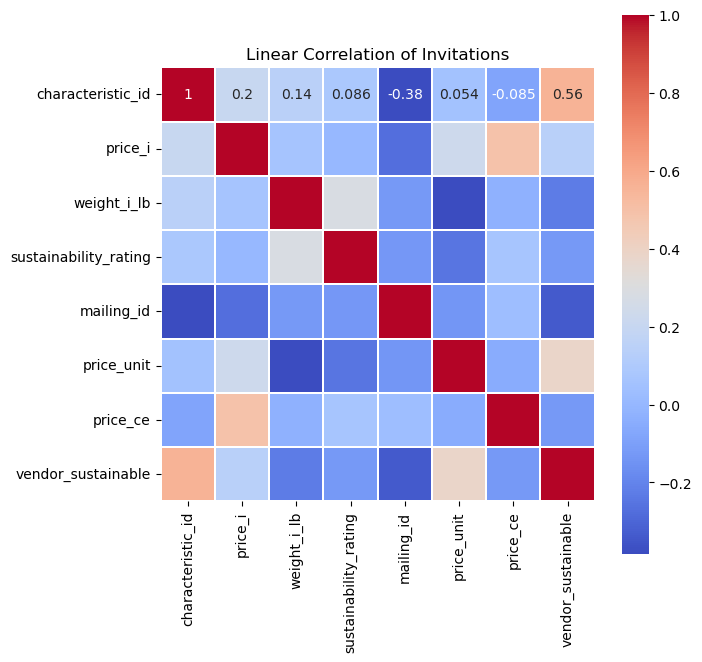

In [131]:
# creating a data frame from correlation - removing categorical values
inv_corr = invitations.select_dtypes(include=[np.number]).corr(method='pearson')

# plot size
fig, ax = plt.subplots( figsize = (7 , 7) )


# a heatmap
sns.heatmap(data= inv_corr, # where the data is coming from
            annot= True, # put numbers in the map
            cmap = 'coolwarm', # color
            square = True, # improve the layout
            linecolor = 'white', # color between boxes
            linewidths = 0.3 # how thick are the lines
           ) 

# chart title
plt.title(label = 'Linear Correlation of Invitations')

# plot display
plt.show(block = True)

/Users/kimberly/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kimberly/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


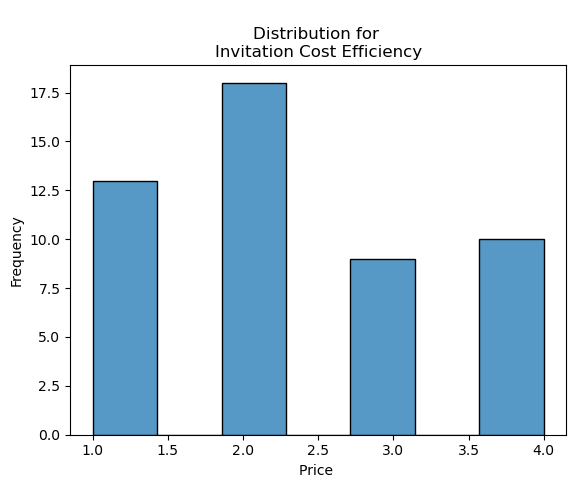

In [132]:
# histogram for price
sns.histplot(data = invitations,
             x    = 'price_ce')


# title and labels
plt.title("""
Distribution for 
Invitation Cost Efficiency""")
plt.xlabel("Price ")
plt.ylabel("Frequency")


# rendering the plot
plt.show()


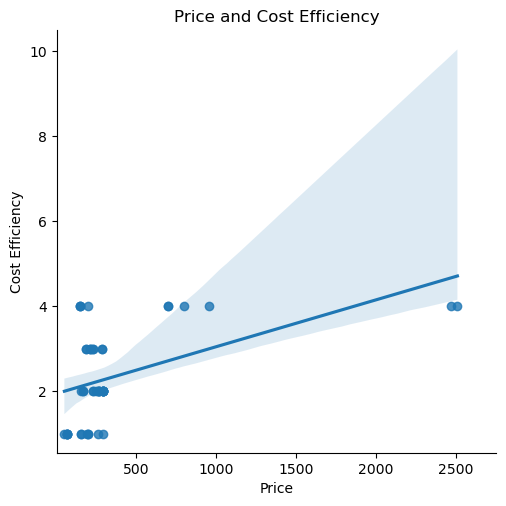

In [134]:
# a scatter plot for carat and price
sns.lmplot(x          = 'price_i' , # x-axis feature
           y          = 'price_ce' , # y-axis feature
           hue        = None    , # categorical data for subsets
           scatter    = True    , # scatter plot
           fit_reg    = True   , # regression line
           aspect     = 1       , # aspect ratio for plot
           data       = invitations) # DataFrame 


# formatting and displaying the plot
plt.title       (label  = 'Price and Cost Efficiency')
plt.xlabel      (xlabel = 'Price'          )
plt.ylabel      (ylabel = 'Cost Efficiency'           )
plt.xlim        (left   = 4, right = 2750) # where x will end
plt.tight_layout(pad    = 0.5                    )
plt.show        (block  = True                    )

In [135]:
# for regression
# importing a package
import statsmodels.formula.api as smf

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """price_i ~ price_ce""",
                  data    = invitations)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                price_i   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     14.96
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           0.000331
Time:                        03:48:23   Log-Likelihood:                -371.91
No. Observations:                  50   AIC:                             747.8
Df Residuals:                      48   BIC:                             751.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -155.4827    142.113     -1.094      0.2

Olenski of Forbes enumerated cost effective marketing strategies, and here are some of them. If wedding planners and/or vendors would transition in cost effective ways to improve in their sales or growing their brand, they could do it through blogging, having a mail list, using online sites to promote, provide calls to action, giving coupons and discounts, using videos. In this way, less money will cost them and aim for less carbon footprint.

For investors, couples and families, they could do research through the internet on which they can fit their budget, their aesthetic, and their beliefs and values. Ensure to gather the information from the true source and be responsible.

Another action for wedding planners and/or vendors is to communicate with the clients, and build a relationship with them. Elhawary (2023) introduced the mapping of the client's journey. Respond promptly and effectively for customer satisfaction.

Being honest with investors, employees, and suppliers also help the company to move forward and also gain valuable insights from them. Providing proof of what the company has done with its pledge or its commitment entices stakeholders' trust.


One of the vendors (Paper Culture) from the invitations department claiming that their products are 100% recycled paper and other eco-friendly materials, which lead to 100% of the carbon footprint of production, and planted 1,000,000 trees. They partnered with organizations like CarbonFund.org to offset their entire carbon footprint. Other products like table numbers are more expensive than others. Some of their invitation prices are the same as other vendors (The Knot) with recycled and non-recycled products. In the case of Coffee n Cream vendor, they do not claim as sustainable company. They are more expensive than the the first two vendors mentioned, a letterpress printing business specializing in custom wedding invitations, greeting cards and stationery. Their printing is typically used for single-color or limited-color printing because each color requires a separate pass through the press.

Based on the given data and mathematical calculations, the answer to the business question is sustainable products are not cost effective, but it is not in the case when the whole product prices are being reviewed.

To finalize the answer sustainable products are not cost effective, To have the answer supported, the calculations are written above. 

References:

Coffee n Cream Press. (n.d.). Coffee n Cream Press. https://coffeencreampress.com/home-1 

Cost Efficiency Guide: What is it &amp; How to Achieve it. GEP. (2016, March 18). https://www.gep.com/cost-efficiency-guide 

Elhawary, M. (2023, July 31). Council Post: 12 Cost-Effective Techniques to Elevate Your B2B Customer Experience. Forbes. https://www.forbes.com/sites/forbesagencycouncil/2023/07/28/12-cost-effective-techniques-to-elevate-your-b2b-customer-experience/?sh=586b22f4c5a1 

Hosseini, S. (2023, July 25). How to Do a T-test in Python. Built In. https://builtin.com/data-science/t-test-python 

Johns, L., Morrison, H., Davis-Peccoud, J., & Carbinato, D. (2023). How brands can sell to environmentally conscious nonconsumers: there is an undeniable gap between what consumers say they want and what they are actually putting in their baskets. Harvard Business Review Digital Articles, 6/5/2023, P1.

Merriam-Webster. (n.d.). Cost-effective definition &amp; meaning. Merriam-Webster. https://www.merriam-webster.com/dictionary/cost-effective 

Olenski, S. (2015, November 24). 7 Cost Effective Marketing Strategies for Growing a New Brand. Forbes. https://www.forbes.com/sites/steveolenski/2015/11/23/7-cost-effective-marketing-strategies-for-growing-a-new-brand/?sh=5336680b9551 

Paper Culture. Product and Process | Paper Culture. (n.d.). https://www.paperculture.com/processes 

What is Sustainability. (2021). UCLA Sustainability. Retrieved December 11, 2023, from https://www.sustain.ucla.edu/what-is-sustainability/#:~:text=Sustainable%20practices%20support%20ecological%2C%20human,in%20which%20resources%20are%20used. 



